In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import scipy
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Dataset/data.csv")

In [4]:
data.head(5)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [5]:
data.tail(5)

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [10]:
print("The number of records in dataset:", data.shape[0])
print("The number of features in dataset:", data.shape[1])

The number of records in dataset: 4009
The number of features in dataset: 4


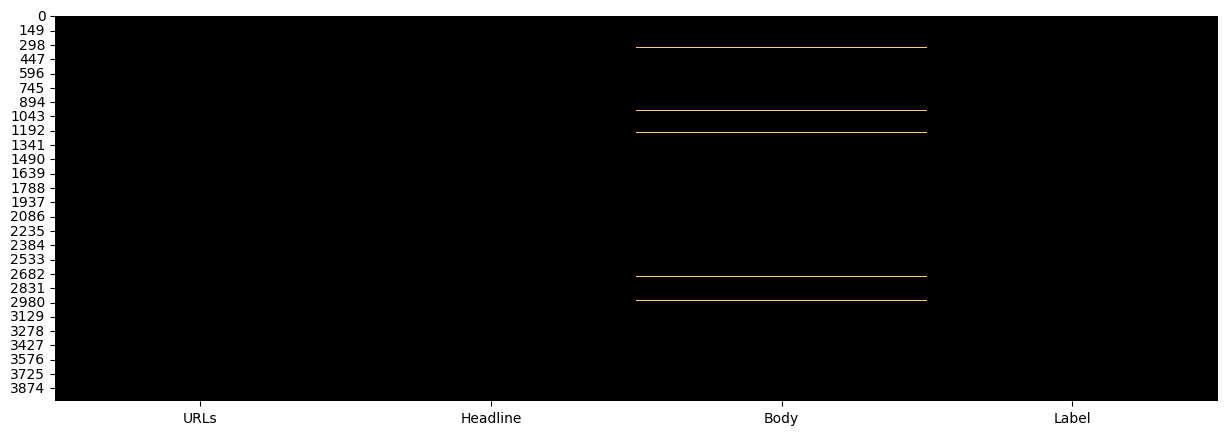

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),cbar = False, cmap='copper');

In [11]:
def missing_values(df):
    return df.isna().sum(axis = 0) / len(df) * 100

In [12]:
missing_values(data)

URLs        0.000000
Headline    0.000000
Body        0.523821
Label       0.000000
dtype: float64

In [20]:
data[data.isnull().any(axis=1)]

,URLs,Headline,Body,Label
247,https://www.nytimes.com/interactive/2017/10/12...,Read Al Green's Resolution to Impeach Donald T...,NaN,1
269,https://www.nytimes.com/2017/10/10/magazine/th...,The Prophet of Germany’s New Right,NaN,1
325,http://edition.cnn.com/interactive/2017/10/mid...,"Hunting the terror group from 70,000ft",NaN,1
395,http://beforeitsnews.com/entertainment/2017/09...,10 Shocking Facts About Porn You Probably Didn...,NaN,0
509,http://beforeitsnews.com/sports/2017/10/105-tr...,"10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...",NaN,0
882,http://beforeitsnews.com/sports/2017/10/103-ha...,"10/3 Happenings: HBD Cap, Johnny, Dog, Tomato,...",NaN,0
973,http://beforeitsnews.com/sports/2017/10/ravens...,Ravens @ Raiders - Wednesday,NaN,0
981,http://beforeitsnews.com/sports/2017/10/104-tr...,10/4 TRS-PNC Park Era: Reds Thump Buc 3x in Pl...,NaN,0
1006,https://www.activistpost.com/2017/09/scientist...,A Comprehensive Database on Chemtrails and Wea...,NaN,0
1133,http://beforeitsnews.com/sports/2017/10/106-hb...,"10/6: HBD Eddie, Tom, Gene, Jeff, Joel & Radha...",NaN,0


In [23]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [24]:
data.drop(["URLs"],axis=1,inplace=True)

In [25]:
data['Headline'] = data['Headline'].apply(lambda x: x.lower())

In [26]:
data.to_csv("Dataset/preprocessed.csv",index=False)